<a href="https://colab.research.google.com/github/A-YTW/23_DM/blob/main/%EC%84%9C%EC%9A%B8%EB%8C%80%EA%B3%B5%EC%9B%90%EC%9E%85%EC%9E%A5%EA%B0%9D%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cd /content/drive/MyDrive/Colab Notebooks/

In [ ]:
#!mkdir ML_project

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/ML_project

/content/drive/MyDrive/Colab Notebooks/ML_project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./park_data.csv')

In [ ]:
# 미세먼지 정보 합칠려고 코드 짜둠. 정상 = 1, 주의 = 2, 경보 = 3
#print(df.columns[23])
df['PM10'] = (df['PM10_warning'] == 1)*3 + (df['PM10_adv'] == 1)*2 + (df['PM10_normal'] == 1)*1


In [ ]:
# 몇월 달인지만 따로 뽑아냄 & 월화수목 = 1, 금 = 2, 토일 = 3 & 몇년도인지도 뽑아냄
temp = []
temp2 = []
temp3 = []
for i, data in enumerate(df['date']):
  if(i % 7 == 4): temp2.append('friday')
  elif(i%7 == 5): temp2.append('sat')
  elif(i%7 == 6): temp2.append("sun")
  elif(i%7 == 0): temp2.append("mon")
  elif(i%7 == 1): temp2.append("tue")
  elif(i%7 == 2): temp2.append("wed")
  elif(i%7 == 3): temp2.append("thu")

  temp.append(data[5:7])
  temp3.append(data[0:4])

df['month'] = temp
df['day'] = temp2
df['year'] = temp3

In [ ]:
corr_matrix = df.corr()

# 상관관계가 0.5 이상인 feature들 필터링
high_corr_features = corr_matrix[abs(corr_matrix) >= 0.5].stack().reset_index()
high_corr_features = high_corr_features[high_corr_features['level_0'] != high_corr_features['level_1']]
high_corr_features.columns = ['feature_1', 'feature_2', 'correlation']

# 상관관계가 0.5 이상인 feature들 출력
high_corr_features.head(30)

<ipython-input-11-20cf76b4abf4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,feature_1,feature_2,correlation
3,temp_avg,temp_min,0.989314
4,temp_avg,temp_max,0.988945
5,temp_avg,sunlight_time_possible,0.825158
6,temp_min,temp_avg,0.989314
8,temp_min,temp_max,0.961250
9,temp_min,humidity_min,0.515985
10,temp_min,humidity_avg,0.523150
11,temp_min,sunlight_time_possible,0.813415
12,temp_max,temp_avg,0.988945
13,temp_max,temp_min,0.961250


In [ ]:
high_corr_features['feature_1'].value_counts()

precipitation_time        7
cloud_under               6
cloud_total               6
humidity_min              6
humidity_avg              6
sunlight_time_normal      6
temp_min                  5
sunlight_amt              4
temp_avg                  3
PM10                      3
sunlight_time_possible    3
temp_max                  3
PM10_adv                  2
PM10_normal               2
snow_new                  1
precipitation_amt         1
PM2.5_adv                 1
PM2.5_normal              1
PM10_warning              1
blossom_on                1
blossom_off               1
snow_total                1
Name: feature_1, dtype: int64

<ipython-input-13-cc3f3da5b757>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['date', 'y', 'holiday'], axis = 1).corr(), annot=True)


<Axes: >

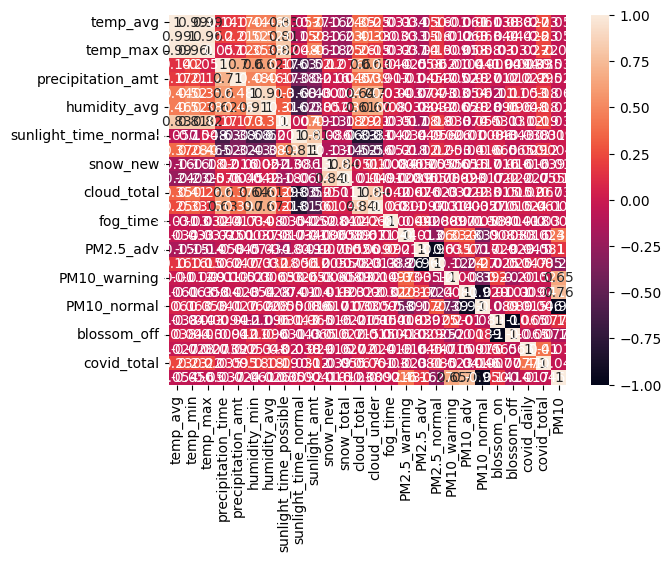

In [ ]:
sns.heatmap(df.drop(['date', 'y', 'holiday'], axis = 1).corr(), annot=True)

In [ ]:
# 쓸모없는 열 삭제
# heatmap 참고
drop_feature = ['temp_avg', 'temp_min', 'precipitation_time', 'humidity_min', 'sunlight_time_possible', 'sunlight_time_normal',\
                'sunlight_amt', 'snow_new', 'snow_total', 'cloud_total', 'cloud_under', 'sky', 'fog_time', 'sunrise', 'sunset',\
                'PM2.5_warning', 'PM2.5_adv', 'PM2.5_normal', 'blossom_on', 'blossom_off', 'covid_daily', 'covid_total', 'PM10_warning', 'PM10_adv', 'PM10_normal']
df=df.drop(drop_feature, axis = 1)

In [ ]:
#기간별로 코로나 단계 추가.
temp = []
temp_i = 0
for i, data in enumerate(df['date']):
  if(data == '2020-02-29'): temp_i = 3
  elif(data == '2020-05-05'): temp_i = 1
  elif(data == '2020-08-16'): temp_i = 2
  elif(data == '2020-08-30'): temp_i = 2.5
  elif(data == '2020-09-14'): temp_i = 2
  elif(data == '2020-09-28'): temp_i = 2
  elif(data == '2020-10-12'): temp_i = 1
  elif(data == '2020-11-19'): temp_i = 1.5
  elif(data == '2020-11-24'): temp_i = 2
  elif(data == '2020-12-08'): temp_i = 2.5
  elif(data == '2021-02-15'): temp_i = 2
  elif(data == '2021-07-12'): temp_i = 4
  elif(data == '2021-11-01'): temp_i = 0
  temp.append(temp_i)
df['level'] = temp

In [ ]:
#결측치제거
df = df.dropna()

In [ ]:
df.head(30)

,date,y,holiday,temp_max,precipitation_amt,humidity_avg,PM10,month,day,year,level
0,2018-01-01,2316.0,1,3.8,0.0,39.1,1,01,mon,2018,0.0
1,2018-01-02,869.0,0,1.8,0.0,42.0,1,01,tue,2018,0.0
2,2018-01-03,694.0,0,-0.4,0.0,42.3,1,01,wed,2018,0.0
3,2018-01-04,670.0,0,-0.7,0.0,43.0,1,01,thu,2018,0.0
4,2018-01-05,758.0,0,1.6,0.0,48.4,1,01,friday,2018,0.0
5,2018-01-06,1935.0,0,2.9,0.0,45.8,1,01,sat,2018,0.0
6,2018-01-07,1881.0,0,2.8,0.0,42.1,1,01,sun,2018,0.0
7,2018-01-08,634.0,0,4.0,0.9,51.9,1,01,mon,2018,0.0
8,2018-01-09,523.0,0,-1.2,0.5,59.4,1,01,tue,2018,0.0
9,2018-01-10,382.0,0,-4.8,0.3,52.0,1,01,wed,2018,0.0


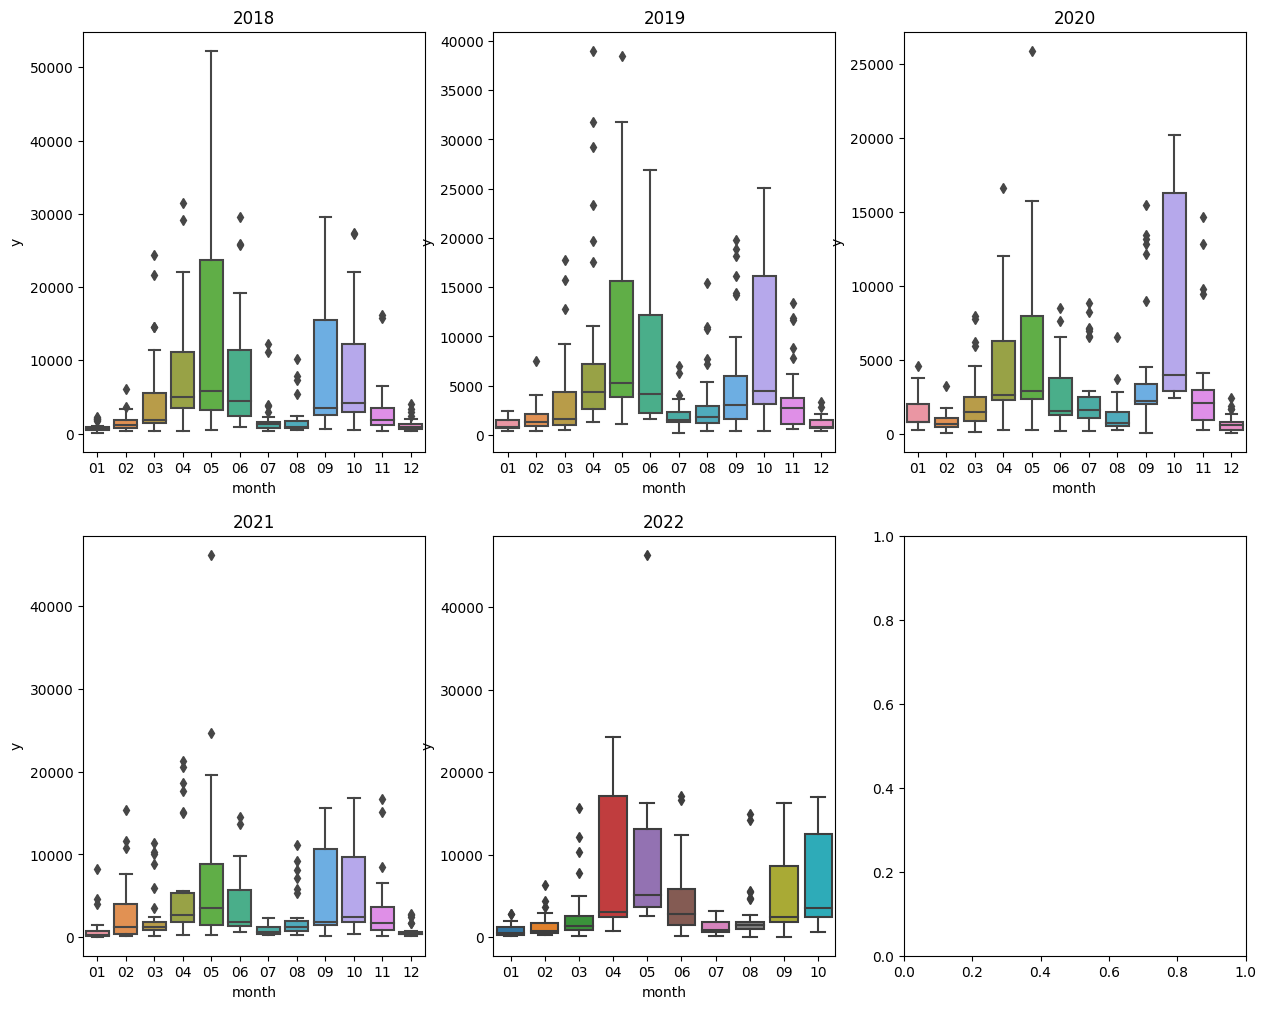

In [ ]:
# 년도마다 월별로 boxplot 그리기
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
for i,year in enumerate(df['year'].unique()):
  sns.boxplot(x='month', y='y', data=df[df['year']==year], ax = axs[i//3][i%3])
  axs[i//3][i%3].set_title(year)

<Axes: xlabel='day', ylabel='y'>

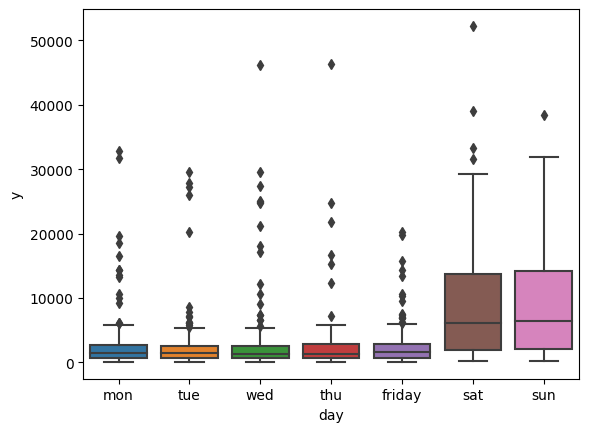

In [ ]:
sns.boxplot(x='day', y='y', data = df)

<Axes: xlabel='month', ylabel='y'>

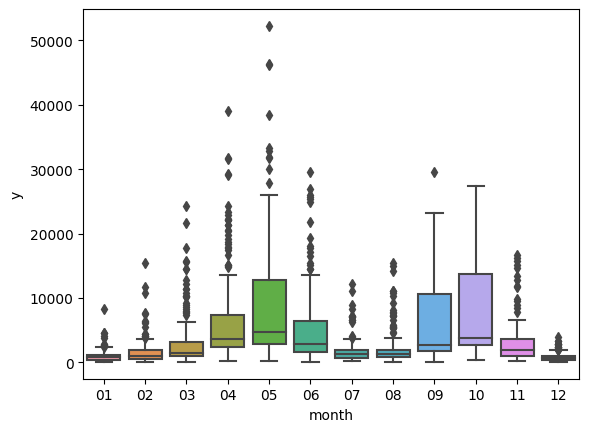

In [ ]:
sns.boxplot(x='month', y='y', data = df)

<Axes: xlabel='year', ylabel='y'>

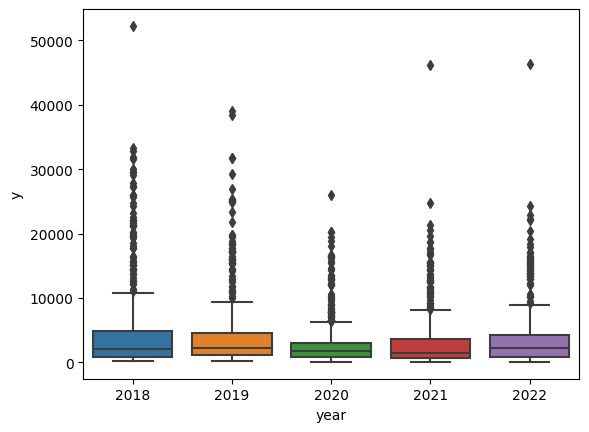

In [ ]:
sns.boxplot(x='year', y='y', data = df)

<Axes: xlabel='holiday', ylabel='y'>

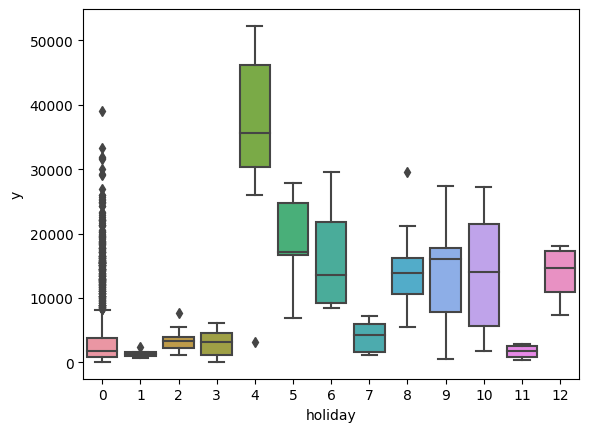

In [ ]:
sns.boxplot(x='holiday', y='y', data = df)

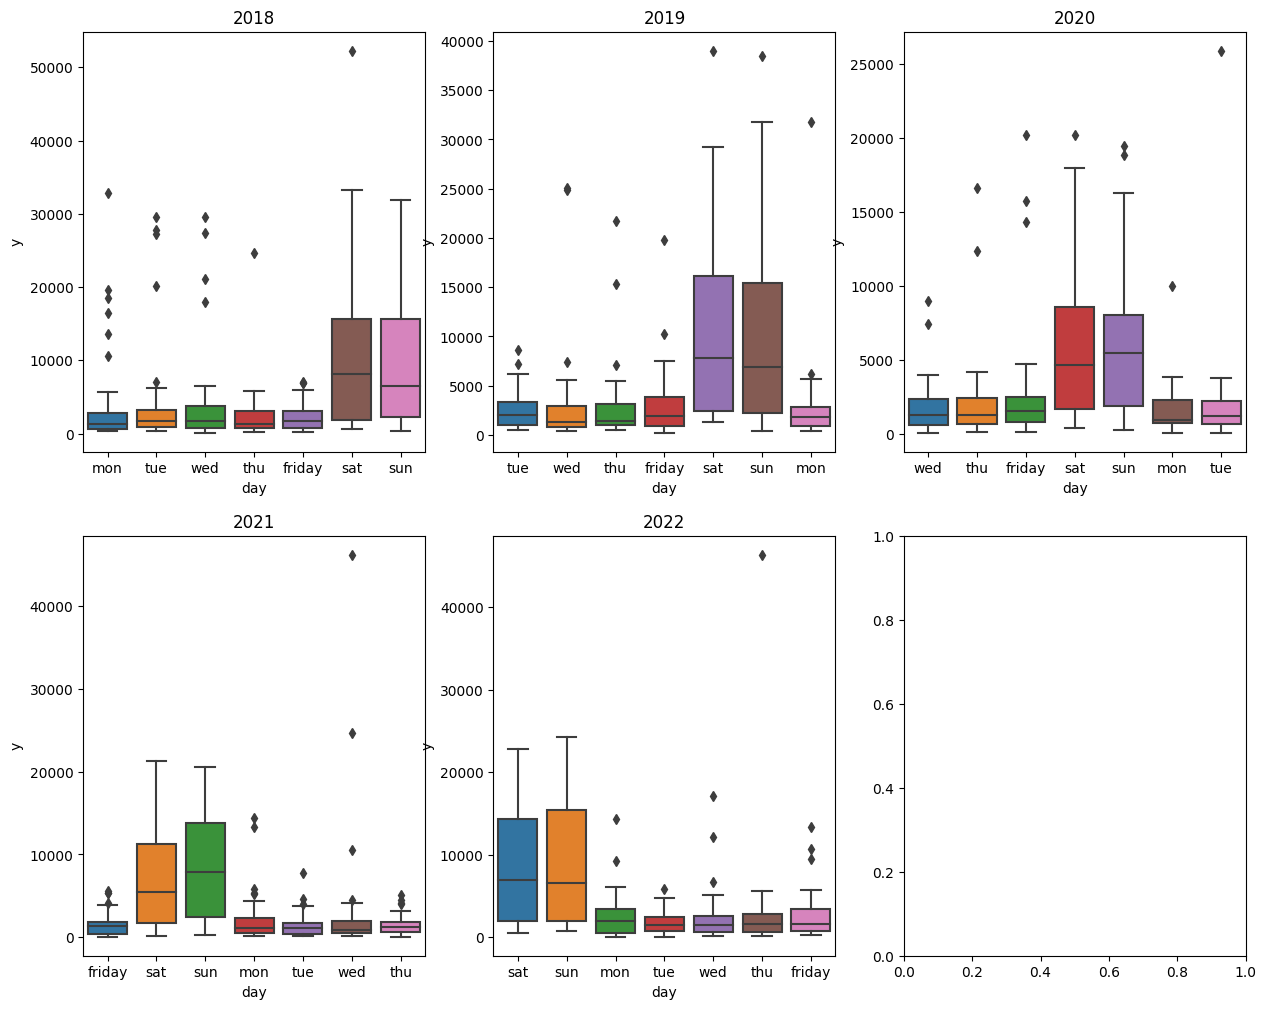

In [ ]:
# 년도마다 요일별로boxplot 그리기
fig, axs = plt.subplots(2, 3, figsize=(15, 12))
for i,year in enumerate(df['year'].unique()):
  sns.boxplot(x='day', y='y', data=df[df['year']==year], ax = axs[i//3][i%3])
  axs[i//3][i%3].set_title(year)

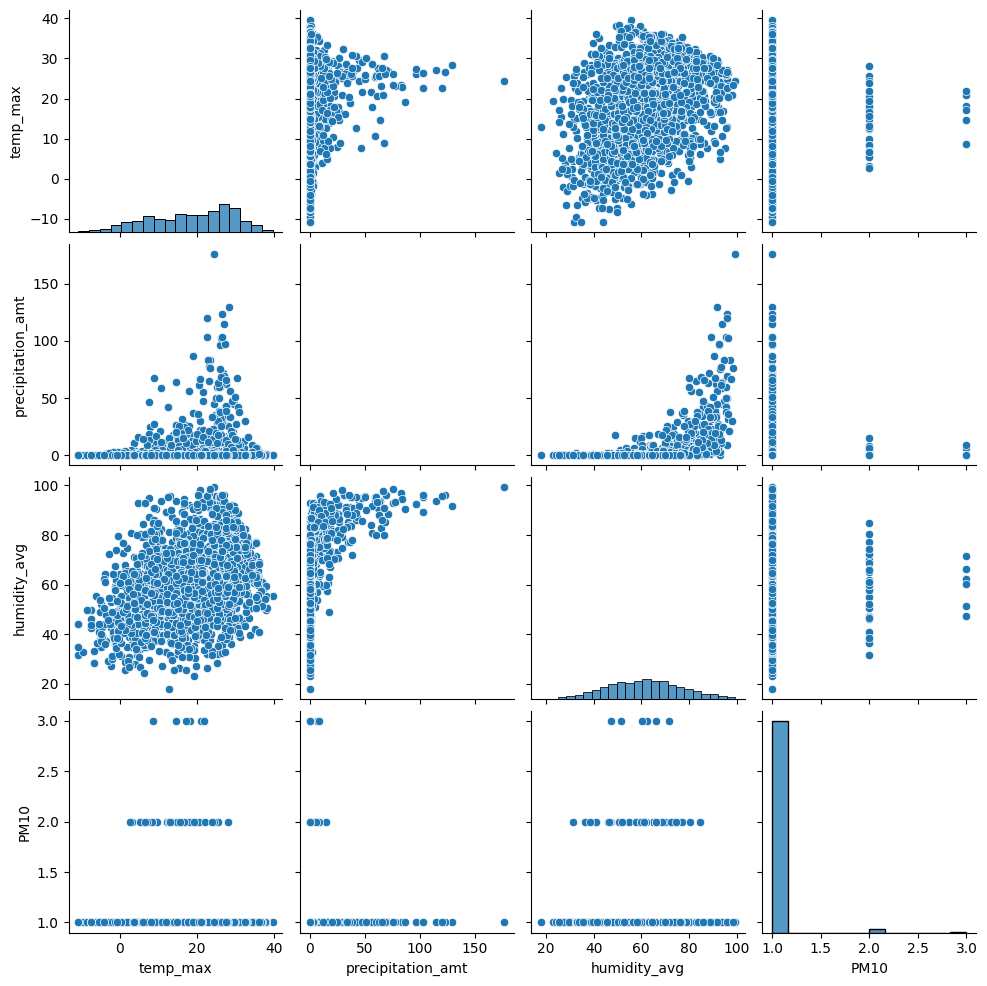

In [ ]:
sns.pairplot(df.drop(['date', 'y', 'holiday', 'month', 'day', 'year', 'level'], axis = 1))

In [ ]:
# 0번째 기간
start_date_0 = '2018-01-01'
end_date_0 = '2020-02-28'
filtered_df = df[(df['date'] >= start_date_0) & (df['date'] <= end_date_0)]
average_0 = filtered_df['y'].mean()
print(f"{start_date_0}부터 {end_date_0}까지의 입장객수 평균: {average_0}")
# 1번째 기간
start_date_1 = '2020-02-29'
end_date_1 = '2020-05-04'
filtered_df = df[(df['date'] >= start_date_1) & (df['date'] <= end_date_1)]
average_1 = filtered_df['y'].mean()
print(f"{start_date_1}부터 {end_date_1}까지의 입장객수 평균: {average_1}")

# 2번째 기간
start_date_2 = '2020-05-05'
end_date_2 = '2020-08-15'
filtered_df = df[(df['date'] >= start_date_2) & (df['date'] <= end_date_2)]
average_2 = filtered_df['y'].mean()
print(f"{start_date_2}부터 {end_date_2}까지의 입장객수 평균: {average_2}")

# 3번째 기간
start_date_3 = '2020-08-16'
end_date_3 = '2020-08-29'
filtered_df = df[(df['date'] >= start_date_3) & (df['date'] <= end_date_3)]
average_3 = filtered_df['y'].mean()
print(f"{start_date_3}부터 {end_date_3}까지의 입장객수 평균: {average_3}")

# 4번째 기간
start_date_4 = '2020-08-30'
end_date_4 = '2020-09-13'
filtered_df = df[(df['date'] >= start_date_4) & (df['date'] <= end_date_4)]
average_4 = filtered_df['y'].mean()
print(f"{start_date_4}부터 {end_date_4}까지의 입장객수 평균: {average_4}")

# 5번째 기간
start_date_5 = '2020-09-14'
end_date_5 = '2020-09-27'
filtered_df = df[(df['date'] >= start_date_5) & (df['date'] <= end_date_5)]
average_5 = filtered_df['y'].mean()
print(f"{start_date_5}부터 {end_date_5}까지의 입장객수 평균: {average_5}")

# 6번째 기간
start_date_6 = '2020-09-28'
end_date_6 = '2020-10-11'
filtered_df = df[(df['date'] >= start_date_6) & (df['date'] <= end_date_6)]
average_6 = filtered_df['y'].mean()
print(f"{start_date_6}부터 {end_date_6}까지의 입장객수 평균: {average_6}")

# 7번째 기간
start_date_7 = '2020-10-12'
end_date_7 = '2020-11-18'
filtered_df = df[(df['date'] >= start_date_7) & (df['date'] <= end_date_7)]
average_7 = filtered_df['y'].mean()
print(f"{start_date_7}부터 {end_date_7}까지의 입장객수 평균: {average_7}")

# 8번째 기간
start_date_8 = '2020-11-19'
end_date_8 = '2020-11-23'
filtered_df = df[(df['date'] >= start_date_8) & (df['date'] <= end_date_8)]
average_8 = filtered_df['y'].mean()
print(f"{start_date_8}부터 {end_date_8}까지의 입장객수 평균: {average_8}")

# 9번째 기간
start_date_9 = '2020-11-24'
end_date_9 = '2020-12-07'
filtered_df = df[(df['date'] >= start_date_9) & (df['date'] <= end_date_9)]
average_9 = filtered_df['y'].mean()
print(f"{start_date_9}부터 {end_date_9}까지의 입장객수 평균: {average_9}")

# 10번째 기간
start_date_10 = '2020-12-08'
end_date_10 = '2021-02-14'
filtered_df = df[(df['date'] >= start_date_10) & (df['date'] <= end_date_10)]
average_10 = filtered_df['y'].mean()
print(f"{start_date_10}부터 {end_date_10}까지의 입장객수 평균: {average_10}")

# 11번째 기간
start_date_11 = '2021-02-15'
end_date_11 = '2021-07-11'
filtered_df = df[(df['date'] >= start_date_11) & (df['date'] <= end_date_11)]
average_11 = filtered_df['y'].mean()
print(f"{start_date_11}부터 {end_date_11}까지의 입장객수 평균: {average_11}")

# 12번째 기간
start_date_12 = '2021-07-12'
end_date_12 = '2021-10-31'
filtered_df = df[(df['date'] >= start_date_12) & (df['date'] <= end_date_12)]
average_12 = filtered_df['y'].mean()
print(f"{start_date_12}부터 {end_date_12}까지의 입장객수 평균: {average_12}")

# 13번째 기간
start_date_13 = '2021-11-01'
end_date_13 = '2021-12-31'
filtered_df = df[(df['date'] >= start_date_13) & (df['date'] <= end_date_13)]
average_13= filtered_df['y'].mean()
print(f"{start_date_13}부터 {end_date_13}까지의 입장객수 평균: {average_13}")

ratios = []
ratios.append(average_0 / average_0)  # 0번째 기간은 자기 자신이므로 1로 설정합니다.
ratios.append(average_0 / average_1)
ratios.append(average_0 / average_2)
ratios.append(average_0 / average_3)
ratios.append(average_0 / average_4)
ratios.append(average_0 / average_5)
ratios.append(average_0 / average_6)
ratios.append(average_0 / average_7)
ratios.append(average_0 / average_8)
ratios.append(average_0 / average_9)
ratios.append(average_0 / average_10)
ratios.append(average_0 / average_11)
ratios.append(average_0 / average_12)
ratios.append(average_0 / average_13)
for i, ratio in enumerate(ratios):
    print(f"{i}번째 기간 입장객수 평균 대비 비율: {ratio}")

# 각 기간에 해당하는 y값 보정
y_values = df['y'].copy()
y_values.loc[(df['date'] >= start_date_0) & (df['date'] <= end_date_0)] *= ratios[0]
y_values.loc[(df['date'] >= start_date_1) & (df['date'] <= end_date_1)] *= ratios[1]
y_values.loc[(df['date'] >= start_date_2) & (df['date'] <= end_date_2)] *= ratios[2]
y_values.loc[(df['date'] >= start_date_3) & (df['date'] <= end_date_3)] *= ratios[3]
y_values.loc[(df['date'] >= start_date_4) & (df['date'] <= end_date_4)] *= ratios[4]
y_values.loc[(df['date'] >= start_date_5) & (df['date'] <= end_date_5)] *= ratios[5]
y_values.loc[(df['date'] >= start_date_6) & (df['date'] <= end_date_6)] *= ratios[6]
y_values.loc[(df['date'] >= start_date_7) & (df['date'] <= end_date_7)] *= ratios[7]
y_values.loc[(df['date'] >= start_date_8) & (df['date'] <= end_date_8)] *= ratios[8]
y_values.loc[(df['date'] >= start_date_9) & (df['date'] <= end_date_9)] *= ratios[9]
y_values.loc[(df['date'] >= start_date_10) & (df['date'] <= end_date_10)] *= ratios[10]
y_values.loc[(df['date'] >= start_date_11) & (df['date'] <= end_date_11)] *= ratios[11]
y_values.loc[(df['date'] >= start_date_12) & (df['date'] <= end_date_12)] *= ratios[12]
y_values.loc[(df['date'] >= start_date_13) & (df['date'] <= end_date_13)] *= ratios[13]

df['y'] = y_values
print(df)

# 0번째 기간
start_date_0 = '2018-01-01'
end_date_0 = '2020-02-28'
filtered_df = df[(df['date'] >= start_date_0) & (df['date'] <= end_date_0)]
average_0 = filtered_df['y'].mean()
print(f"{start_date_0}부터 {end_date_0}까지의 입장객수 평균: {average_0}")

#여기까지가 진짜 코드고 아래는 확인용
# 1번째 기간
start_date_1 = '2020-02-29'
end_date_1 = '2020-05-04'
filtered_df = df[(df['date'] >= start_date_1) & (df['date'] <= end_date_1)]
average_1 = filtered_df['y'].mean()
print(f"{start_date_1}부터 {end_date_1}까지의 입장객수 평균: {average_1}")

# 2번째 기간
start_date_2 = '2020-05-05'
end_date_2 = '2020-08-15'
filtered_df = df[(df['date'] >= start_date_2) & (df['date'] <= end_date_2)]
average_2 = filtered_df['y'].mean()
print(f"{start_date_2}부터 {end_date_2}까지의 입장객수 평균: {average_2}")


2018-01-01부터 2020-02-28까지의 입장객수 평균: 4678.173857868021
2020-02-29부터 2020-05-04까지의 입장객수 평균: 3720.1363636363635
2020-05-05부터 2020-08-15까지의 입장객수 평균: 2932.5436893203882
2020-08-16부터 2020-08-29까지의 입장객수 평균: 1353.9285714285713
2020-08-30부터 2020-09-13까지의 입장객수 평균: 2451.9333333333334
2020-09-14부터 2020-09-27까지의 입장객수 평균: 5381.5
2020-09-28부터 2020-10-11까지의 입장객수 평균: 9665.5
2020-10-12부터 2020-11-18까지의 입장객수 평균: 5876.605263157895
2020-11-19부터 2020-11-23까지의 입장객수 평균: 1730.4
2020-11-24부터 2020-12-07까지의 입장객수 평균: 1051.5714285714287
2020-12-08부터 2021-02-14까지의 입장객수 평균: 1046.231884057971
2021-02-15부터 2021-07-11까지의 입장객수 평균: 4504.285714285715
2021-07-12부터 2021-10-31까지의 입장객수 평균: 3763.9375
2021-11-01부터 2021-12-31까지의 입장객수 평균: 1943.032786885246
0번째 기간 입장객수 평균 대비 비율: 1.0
1번째 기간 입장객수 평균 대비 비율: 1.2575275206565797
2번째 기간 입장객수 평균 대비 비율: 1.5952614363103246
3번째 기간 입장객수 평균 대비 비율: 3.4552589823345974
4번째 기간 입장객수 평균 대비 비율: 1.9079531218363823
5번째 기간 입장객수 평균 대비 비율: 0.8693066724645583
6번째 기간 입장객수 평균 대비 비율: 0.4840074344698175
7번째 기간 입

In [ ]:
df.columns

Index(['date', 'y', 'holiday', 'temp_max', 'precipitation_amt', 'humidity_avg',
       'PM10', 'month', 'day', 'year', 'level'],
      dtype='object')

In [ ]:
X = df_model.drop(['date', 'LogY'], axis=1)
y = df_model['LogY']

X_train = X[X['year_2022'] == 0]
X_test = X[X['year_2022'] == 1]
y_train = y[X['year_2022'] == 0]
y_test = y[X['year_2022'] == 1]

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

#데이터 정규화
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
sc.fit(X_test)
X_test = sc.transform(X_test)

In [ ]:
##### Log transformation과 이상치 제거
# 확률밀도함수 그리기
sns.kdeplot(data=df, x='y')

# 그래프 출력
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.show()


In [ ]:
from scipy import stats
# Log 변환
df['LogY'] = np.log(df['y'])

# 확률밀도함수 그리기
sns.kdeplot(data=df, x='LogY')

# 그래프 출력
plt.xlabel('Log Y')
plt.ylabel('Density')
plt.title('Log Transformed Probability Density Function')
plt.show()

# 정규 Q-Q Plot 그리기
stats.probplot(df['LogY'], dist="norm", plot=plt)

# 그래프 출력
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Log Y)')
plt.title('Normal Q-Q Plot')
plt.show()

In [ ]:
# one-hot encoding 구현

In [ ]:
df_model = df.drop(['y', 'holiday', 'PM10', 'month', 'day', 'year', 'level'], axis = 1)
df_model.columns

In [ ]:
df_categorical = [df.holiday, df.PM10, df.month, df.day, df.year]

for feature in df_categorical:

  dummies = pd.get_dummies(feature)

  for dummy in dummies:
    dummies.rename(columns = {dummy : feature.name + '_' + str(dummy)}, inplace = True)

  df_model = df_model.join(dummies)

df_model.columns

Ensemble Decision Tree

In [ ]:
# train, test 데이터 분할
X = df.drop(['date','y'], axis=1)
y = df['y']
df_train = df[df['year']!='2022']
df_test = df[df['year']=='2022']
y=y.astype('int')
X_test = X[X['year'] == '2022']
X_train = X[X['year'] != '2022']
y_train = df_train['y']
y_test = df_test['y']

In [ ]:
df=df.dropna()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# feature와 레이블 분리
X = df[['date', 'holiday', 'temp_max', 'precipitation_amt', 'humidity_avg', 'PM10', 'month', 'day', 'year']]
y = df['y']

# Ensemble Decision Tree 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 조합 탐색
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)

# 테스트 데이터에 대한 예측
y_pred = grid_search.predict(X_test)
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가 (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
estimator = model.estimators_[0]
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.title("Decision Tree Visualization")
_ = plot_tree(estimator, feature_names=feature_names, filled=True)
plt.show()

Linear Regression

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_model.drop(['date', 'LogY'], axis=1)
y = df_model['LogY']

X_train = X[X['year_2022'] == 0]
X_test = X[X['year_2022'] == 1]
y_train = y[X['year_2022'] == 0]
y_test = y[X['year_2022'] == 1]

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

In [ ]:
y_pred = model_lr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

In [ ]:
# 5-fold 교차 검증 수행
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = -cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

print("MSE Scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))

# 모델 학습
model_lr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model_lr.predict(X_test)

# 테스트 데이터에 대한 MSE 계산
mse_test = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse_test)

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adjusted_r2

# adjusted R^2 계산
n_features = X.shape[1]
adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_features)
print("Adjusted R^2:", adjusted_r2)